<a href="https://colab.research.google.com/github/hwanython/mmdet_start/blob/main/mmdetection_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMCV 설치 Full 설치하는 것이 오류 발생하지 않음

In [2]:
!pip install mmcv-full

     |████████████████████████████████| 405 kB 5.5 MB/s 
     |████████████████████████████████| 190 kB 41.6 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.4.2-cp37-cp37m-linux_x86_64.whl size=54125060 sha256=229b37df9426c4386fe5d5ad236a2276eb07b7a4f1ba22c74c0e521da9715773
  Stored in directory: /root/.cache/pip/wheels/8c/8f/bb/1f5175b7c29fe9457b67a24ad28bb532eed19ee9bbbbd3fb99
Successfully built mmcv-full


In [6]:
!pwd

/content


#mmdetection 설치

In [9]:
!pip install mmdet
!git clone https://github.com/open-mmlab/mmdetection.git

# !pip install -r requirements/build.txt
# !python setup.py develop
# # !pip install -v -e .  # or ""

fatal: destination path 'mmdetection' already exists and is not an empty directory.


In [15]:
%cd /content/mmdetection/
%pwd

/content/mmdetection


'/content/mmdetection'

In [18]:
!pip install -r requirements/build.txt
!pip install -e . 
!pip install Pillow==7.0.0

Obtaining file:///content/mmdetection
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.20.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 7.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#설치 확인

In [19]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.10.0+cu111 True
2.20.0
11.1
GCC 7.5


In [20]:
!pwd

/content/mmdetection


In [21]:
!mkdir checkpoints

In [28]:
% cd ..
!pwd

/content
/content


In [32]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [37]:
%cd mmdetection/

/content/mmdetection


In [40]:
# Specify the path to model config and checkpoint file
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [43]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import shutil
fr = r'/content/drive/MyDrive/tmp/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
af = r'/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
shutil.copy(fr, af)

'/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [46]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')


load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [48]:
!pwd


/content/mmdetection


In [49]:
# test a single image and show the results
img = 'demo/demo.jpg'  # or img = mmcv.imread(img), which will only load it once

In [50]:
result = inference_detector(model, img)
# visualize the results in a new window

In [51]:
model.show_result(img, result)


array([[[24, 60, 30],
        [22, 59, 25],
        [30, 68, 32],
        ...,
        [33, 52, 25],
        [14, 48, 18],
        [17, 62, 35]],

       [[13, 48, 28],
        [27, 62, 36],
        [27, 64, 30],
        ...,
        [30, 67, 31],
        [16, 91, 53],
        [11, 63, 43]],

       [[ 0, 42, 23],
        [ 8, 50, 25],
        [20, 61, 29],
        ...,
        [12, 53, 16],
        [15, 74, 44],
        [13, 46, 38]],

       ...,

       [[44, 67, 62],
        [27, 65, 57],
        [49, 83, 74],
        ...,
        [38, 75, 55],
        [18, 47, 31],
        [42, 79, 62]],

       [[39, 65, 59],
        [18, 55, 45],
        [60, 91, 82],
        ...,
        [29, 66, 46],
        [20, 52, 35],
        [56, 93, 77]],

       [[42, 70, 64],
        [59, 94, 84],
        [48, 75, 66],
        ...,
        [41, 78, 58],
        [29, 61, 44],
        [29, 68, 53]]], dtype=uint8)

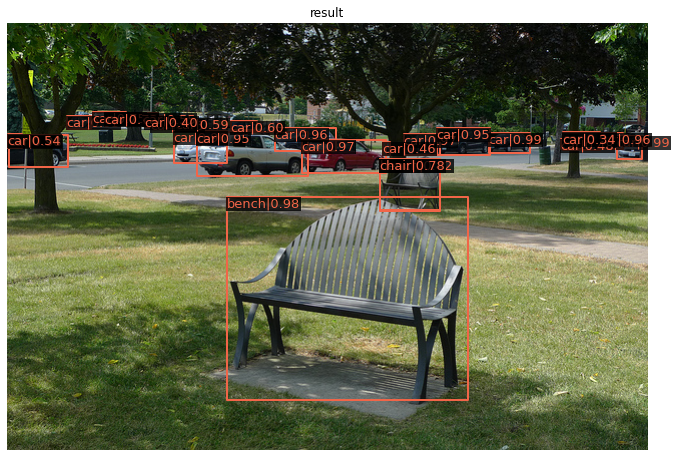

In [53]:
from mmdet.apis import show_result_pyplot
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)